<a href="https://colab.research.google.com/github/HVTrieuDuong/TRI-TUE-NHAN-TAO-HCMUTE/blob/main/10foodVN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_generator = ImageDataGenerator(rescale=1./255,
                                    validation_split=0.1,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

In [ ]:
trainset='/content/drive/MyDrive/Foods/Train/'

In [ ]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)
     

Found 991 images belonging to 10 classes.
Found 110 images belonging to 10 classes.


In [ ]:
{'.ipynb_checkpoints': 0,
 'banh beo': 1,
 'banh bot loc': 2,
 'banh mi': 3,
 'banh trang nuong': 4,
 'banh xeo': 5,
 'bun bo Hue': 6,
 'bun dau mam tom': 7,
 'bun rieu': 8,
 'bun thit nuong': 9,
 'com tam': 10}

{'.ipynb_checkpoints': 0,
 'banh beo': 1,
 'banh bot loc': 2,
 'banh mi': 3,
 'banh trang nuong': 4,
 'banh xeo': 5,
 'bun bo Hue': 6,
 'bun dau mam tom': 7,
 'bun rieu': 8,
 'bun thit nuong': 9,
 'com tam': 10}

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(100,100,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_dataset,batch_size=128,epochs=50,verbose=1,validation_data=validation_set)

Epoch 1/50
8/8 [==============================] - 242s 32s/step - loss: 4.1116 - accuracy: 0.0999 - val_loss: 2.3039 - val_accuracy: 0.1000
Epoch 2/50
8/8 [==============================] - 130s 16s/step - loss: 2.3070 - accuracy: 0.0858 - val_loss: 2.3018 - val_accuracy: 0.1000
Epoch 3/50
8/8 [==============================] - 131s 16s/step - loss: 2.3029 - accuracy: 0.1049 - val_loss: 2.3007 - val_accuracy: 0.1000
Epoch 4/50
8/8 [==============================] - 132s 16s/step - loss: 2.3004 - accuracy: 0.0989 - val_loss: 2.2979 - val_accuracy: 0.1000
Epoch 5/50
8/8 [==============================] - 133s 16s/step - loss: 2.2954 - accuracy: 0.1251 - val_loss: 2.2788 - val_accuracy: 0.1273
Epoch 6/50
8/8 [==============================] - 128s 16s/step - loss: 2.2732 - accuracy: 0.1514 - val_loss: 2.2668 - val_accuracy: 0.1182
Epoch 7/50
8/8 [==============================] - 132s 16s/step - loss: 2.2403 - accuracy: 0.1514 - val_loss: 2.2168 - val_accuracy: 0.1636
Epoch 8/50
8/8 [====

In [ ]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 991 images belonging to 10 classes.
Found 110 images belonging to 10 classes.


In [ ]:

model.save('monan13.hs')

In [ ]:
model1=load_model('monan12.hs')

In [ ]:
label = ['banh beo','banh bot loc','bun rieu','banh trang nuong','banh xeo','nun bo Hue','bun dau mam tom','banh mi','bun thit nuong','com tam']

1/1 [==============================] - 0s 46ms/step
banh mi


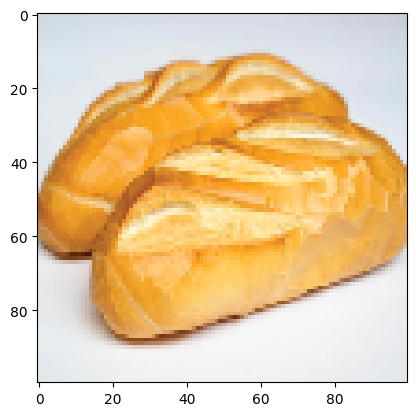

In [ ]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/HCMUTE Cơ-điện tử/Banhmi.jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 72ms/step
bun dau mam tom


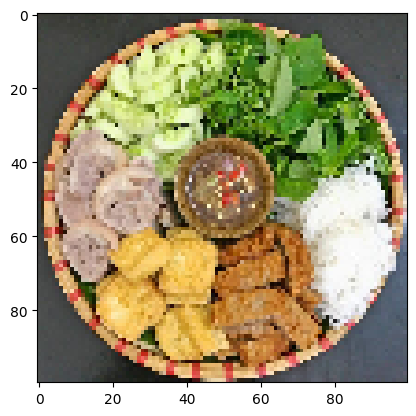

In [ ]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/HCMUTE Cơ-điện tử/anh-bun-dam-mam-tom-met.jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])